In [1]:
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.tools import FigureFactory as FF

In [2]:
import numpy as np
import pandas as pd
import scipy
import random

In [5]:
x=[0]

for j in range(100):
    step_x=random.randint(0,1)
    if step_x==1:
        x.append(x[j] + 1 + 0.08*np.random.normal())
    else:
        x.append(x[j] - 1 + 0.08*np.random.normal())

y=[0.05*np.random.normal() for j in range(len(x))]

trace1 = go.Scatter(
x=x,
y=y,
mode='markers',
name='Random walk in 1D',
marker=dict(
    color=[i for i in range(len(x))],
    size=6,
    colorscale=[[0, 'rgb(178, 10, 28)'], [0.50, 'rgb(245, 160, 105)'],
                [0.66, 'rgb(245, 195, 157)'], [1, 'rgb(220, 220, 220)']],
    showscale=True,
)
)

layout=go.Layout(
    yaxis=dict(
            range=[-1,1]
    )
)

data = [trace1]
fig=go.Figure(data=data, layout=layout)
py.iplot(fig, filename='random-walk-1d')

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~sananand007/0 or inside your plot.ly account where it is named 'random-walk-1d'


#### In practice, TD prediction converges faster than MC prediction. (That said, no one has yet been able to prove this, and it remains an open problem.) 
+ Let's see we we can check this for ourself in your implementations! For an example of how to run this kind of analysis, check out Example 6.2
+ 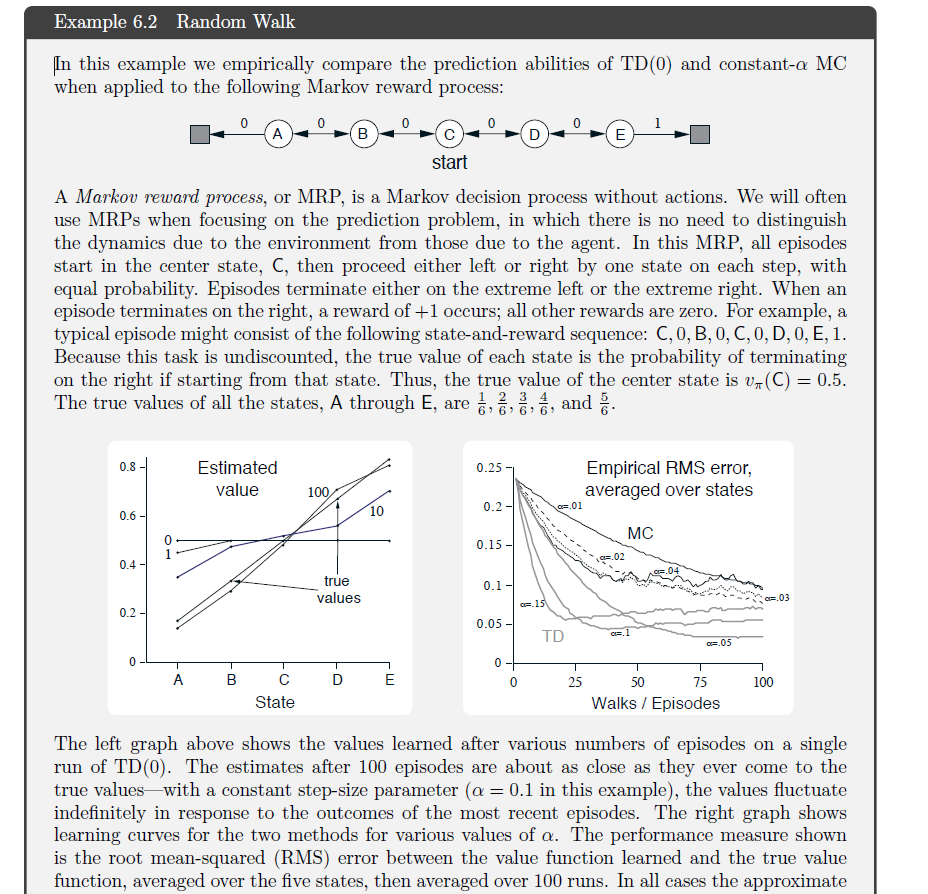

In [7]:
import math, sys, json, random
import matplotlib
import matplotlib.style
import matplotlib.pyplot as plt

# import seaborn as sns

from sklearn.externals import joblib 

from __future__ import division
%matplotlib inline

### Implementing the TD(lambda) algorithm , with lambda=0 
+ Implementing TD(0)
+ 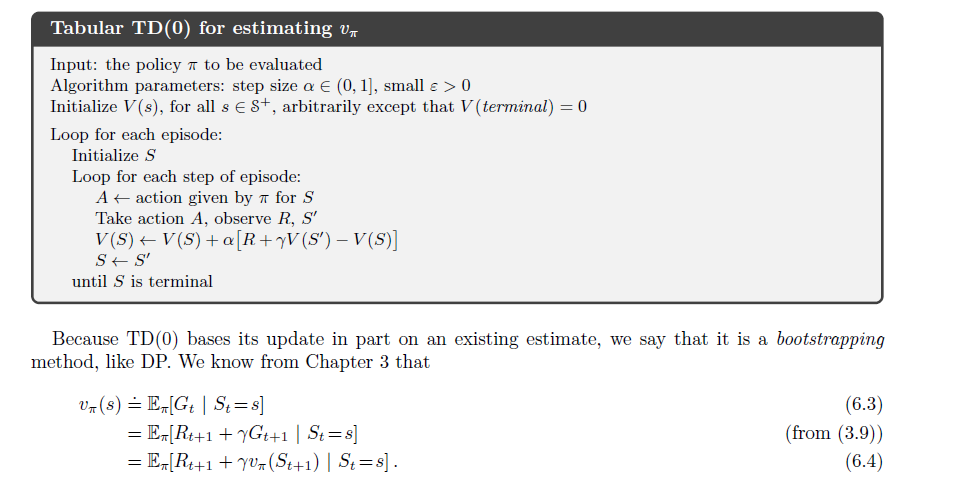

In [13]:
def tdlambda(aplha, lambda_, states, values):
    """
    alpha  : range (0,1]
    lambda_: range [0,1]
    states : Different states [5 for this case]
    values :
    
    returns: updates
    """
    # 5 possible states, [A, B, C, D, E], A and E are the end states
    eligibility = np.zeros(5)
    updates = np.zeros(5)
    for t in range(0, len(states)-1):
        curr_=states[t]
        next_=states[t+1]
        
        eligibility[t] += 1.0
        td=alpha*(values[next_]-values[curr_])
        
        updates[t]+=td*eligibility
        eligibility *= lambda_
    return updates


states_ = ["A","B","C","D","E"]

def state_sim():
    """
    returns: states picked from random sample
    """
    #move either left or right randomly and end when we reach 0 or 4
    states_=[2]
    while states_[-1] not in [0,4]:
        states_.append(states_[-1] + (1 if np.random.choice([True, False]) else -1)) 
    return states_    

In [17]:
# data for plots
true_prob=[1/6, 1/3, 1/2, 2/3, 5/6] # Given in the Example 6.2
num_train_sets = 100
num_episodes = 100

training_set = [[state_sim() for i in range(num_episodes)] for i in range(num_train_sets)]

In [18]:
training_set[0]

[[2, 3, 2, 1, 0],
 [2, 1, 2, 3, 2, 1, 0],
 [2, 1, 0],
 [2, 3, 2, 3, 2, 1, 0],
 [2, 1, 0],
 [2, 3, 2, 3, 2, 1, 2, 3, 4],
 [2, 1, 0],
 [2, 3, 4],
 [2, 3, 4],
 [2, 3, 2, 3, 4],
 [2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 1, 0],
 [2, 1, 2, 3, 2, 3, 2, 1, 2, 3, 4],
 [2, 1, 2, 3, 4],
 [2, 3, 2, 1, 0],
 [2, 1, 2, 1, 0],
 [2, 1, 0],
 [2, 1, 0],
 [2, 1, 0],
 [2, 1, 0],
 [2, 1, 0],
 [2, 3, 4],
 [2, 1, 2, 3, 4],
 [2, 1, 0],
 [2, 1, 0],
 [2, 1, 2, 3, 2, 1, 0],
 [2, 3, 4],
 [2, 1, 0],
 [2, 3, 4],
 [2, 3, 2, 1, 0],
 [2, 3, 2, 3, 4],
 [2, 1, 2, 1, 2, 3, 2, 3, 4],
 [2, 1, 0],
 [2, 3, 4],
 [2, 1, 2, 3, 4],
 [2, 3, 4],
 [2, 3, 2, 3, 4],
 [2, 3, 4],
 [2, 3, 4],
 [2, 3, 2, 1, 0],
 [2, 3, 4],
 [2, 1, 2, 3, 4],
 [2, 1, 0],
 [2, 1, 2, 3, 4],
 [2, 1, 0],
 [2, 3, 4],
 [2, 3, 2, 3, 2, 3, 2, 3, 4],
 [2, 3, 4],
 [2, 1, 0],
 [2, 1, 2, 3, 4],
 [2, 1, 0],
 [2, 3, 2, 1, 0],
 [2, 1, 0],
 [2, 3, 2, 1, 2, 3, 4],
 [2, 3, 2, 1, 2, 3, 2, 3, 4],
 [2, 1, 0],
 [2, 3, 2, 1, 2, 3, 4],
 [2, 1, 2, 3, 2, 1, 2, 1, 2, 1, 2, 1, 2, 3, 2, 1, 2,

#### plotting the number of times each state is seen for one random episode

In [19]:
# Counts based on the states.
from collections import defaultdict
def count_return(episode_list_):
    '''
    Returns the Dict, with counts for each state
    '''
    state_dict=defaultdict(lambda:0)
    for i in range(100):
        for s in episode_list_[i] : state_dict[states_[s]]+=1
    return state_dict        

In [20]:
import bokeh

ModuleNotFoundError: No module named 'bokeh'